In [1]:
import numpy as np
import pandas as pd
from skimage.transform import resize
from skimage.io import imread
import matplotlib.pyplot as plt
from keras.models import load_model

from code.detection import load_data

from os.path import join

Using TensorFlow backend.


In [2]:
def read_csv(filename):
    res = {}
    with open(filename) as fhandle:
        next(fhandle)
        for line in fhandle:
            parts = line.rstrip('\n').split(',')
            coords = np.array([float(x) for x in parts[1:]], dtype='float64')
            res[parts[0]] = coords
    return res

In [3]:
model = load_model('model.hdf5')

In [4]:
test_gt = read_csv(join('data/cv_data/test/', 'gt.csv'))

In [5]:
X, _, scales = load_data('data/cv_data/test/images/', test_gt, (*(100, 100), 1), test=True)

In [6]:
y_pred = model.predict(X)

In [7]:
y_pred_sc = y_pred * 19 + 42

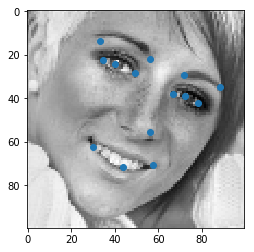

In [11]:
i = 3
dots = y_pred_sc[i]
plt.imshow(X[i][..., 0], cmap='gray')
plt.scatter(dots[::2], dots[1::2])
plt.show()